In [1]:
import pandas as pd
import numpy as np

In [2]:
btc = pd.read_csv("data/BTC_1H.csv", parse_dates=["timestamp"]).rename(columns={"close": "close_BTC"})
eth = pd.read_csv("data/ETH_1H.csv", parse_dates=["timestamp"]).rename(columns={"close": "close_ETH"})
sol = pd.read_csv("data/SOL_1H.csv", parse_dates=["timestamp"]).rename(columns={"close": "close_SOL"})
ltc = pd.read_csv("data/LTC_1H.csv", parse_dates=["timestamp"])



In [3]:
anchor = pd.merge(
    btc[["timestamp", "close_BTC"]],
    eth[["timestamp", "close_ETH"]],
    on="timestamp", how="inner"
)



In [4]:

ltc["usd_volume"] = ltc["close"] * ltc["volume"]
ltc = ltc[ltc["timestamp"] < "2025-05-09"]
daily = ltc.set_index("timestamp")["usd_volume"].resample("D").sum()
print("Avg daily USD volume:", daily.mean())


Avg daily USD volume: 104172627.2808361


##Eligibility of LTC confirmed

In [ ]:
from strategy import generate_signals
from backtest import backtest_signals

In [6]:
signals = generate_signals(ltc, anchor)
print(signals['signal'].value_counts())



signal
HOLD    3034
SELL      19
BUY       19
Name: count, dtype: int64


In [7]:
results_df, metrics = backtest_signals(signals, ltc)


In [8]:
print(metrics)

{'final_capital': np.float64(1429.85), 'final_return_pct': np.float64(42.98), 'sharpe_ratio': np.float64(0.0189), 'max_drawdown_pct': np.float64(20.76)}


In [9]:
results_df[results_df["signal"] != "HOLD"].head(20)


,timestamp,signal,close,position,cash,holdings,capital,returns
406,2025-01-17 22:00:00,SELL,134.99,0,1000.000000,0.000000,1000.000000,0.000000
411,2025-01-18 03:00:00,BUY,129.68,0,0.000000,7.703578,999.000000,-0.001000
577,2025-01-25 01:00:00,SELL,124.66,0,959.367710,0.000000,959.367710,0.038054
582,2025-01-25 06:00:00,BUY,121.96,0,0.000000,7.858383,958.408342,-0.001000
710,2025-01-30 14:00:00,BUY,131.27,0,0.000000,7.858383,1031.569885,-0.009507
715,2025-01-30 19:00:00,SELL,128.67,0,1010.126952,0.000000,1010.126952,-0.007939
732,2025-01-31 12:00:00,BUY,132.15,0,0.000000,7.636147,1009.116825,-0.001000
737,2025-01-31 17:00:00,SELL,128.18,0,977.822520,0.000000,977.822520,-0.009040
817,2025-02-04 01:00:00,SELL,107.57,0,977.822520,0.000000,977.822520,0.000000
821,2025-02-04 05:00:00,BUY,99.77,0,0.000000,9.790966,976.844697,-0.001000


<Axes: title={'center': 'Capital Curve'}>

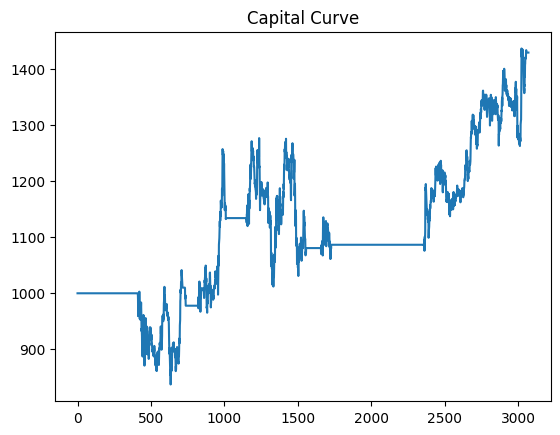

In [10]:
from matplotlib import pyplot
results_df["capital"].plot(title="Capital Curve")
